# Planejamento Fatorial em Python 

Nesta última seção vamos abordar de fato a Quimiometria utilizando a linguagem Python. Para isso, vamos reproduzir os problemas envolvidos na publicação do Tutorial da Revista Química Nova __"APLICAÇÃO DE PROGRAMA COMPUTACIONAL LIVRE EM PLANEJAMENTO DE EXPERIMENTOS: UM TUTORIAL"__$^{[1]}$ realizados pelo Prof. Dr. Edenir Pereira Filho e Prof. Dra. Fabíola Manhas Verbi Pereira. A leitura do artigo é essencial para entender os conceitos abordados nesta seção. Recomenda-se também como material suplementar, as **playlists 8, 9, 10, 11, 12** de resolução dos exemplos através do *Octave* no Canal do YouTube, os endereços de acesso estão anexados ao **Material Suplementar**.

Nosso principal auxiliar para o tratamento dos dados será o arquivo *pde.py* (Planejamento de Experimentos), este arquivo é uma biblioteca que eu desenvolvi que se baseia nas rotinas do *Octave* feito pelo Professor Edenir. Dentre essas rotinas incluem: a *fabi_efeito*, que **calcula os efeitos e porcentagem dos efeitos**; *regression2*, que gera a **equação do modelo** e define os **coeficientes significantes** através de análise de variância **(ANOVA)**; *super_fabi*, que constrói os **gráficos de superfície e de contorno** juntamente com a **condição experimental ideal** e seu respectivo **valor máximo de resposta**.    


# Bibliotecas 
Como nesta seção será utilizado a biblioteca personalizada *pde.py*, atente-se sobre as versões dos pacotes abaixo em seu computador. Caso necessário, utilize os comandos abaixo para instalar os pacotes: \
\
`pip intall nome_biblioteca == 0.0.0` \
\
```$ conda create -n nome_ambiente python=versão nome_biblioteca=versão anaconda```

Utilize o *magic method* `"__version__"` para verificar as versões dos pacotes.

**- - - PACOTES NECESSÁRIOS - - -**

- **Pandas** -> versão  = 1.4.1
- **Numpy** -> versão  = 1.22.3
- **Scipy** -> versão  = 1.7.3
- **Matplotlib** -> versão = 3.5.1
- **Tabulate** -> versão  = 0.8.9
 

Vale salientar que não é preciso utilizar o comando `import` das bibliotecas acima, uma vez que estes pacotes estão embutidos ao arquivo *pde.py*, exceto propriamente o módulo **pde** e o **Pandas** que utilizaremos para a carregar os dados para o **Jupyter Notebook** ou para o **Google Colaboratory**. Segue abaixo a importação dos recursos que utilizaremos para a reprodução dos resultados encontrados no **Tutorial da Química Nova**. 

In [2]:
import pandas as pd
import pde

# Exemplo 1 - Planejamento Fatorial Completo de Composto Central

## Exemplo 1: Planejamento Fatorial Completo Composto Central

O primeiro exemplo se trata de um **planejamento fatorial completo** onde se tem como **objetivo maximizar a intensidade da luminosidade da fluorescência**, de modo que este sinal é proporcional à concentração de antimônio da amostra.$^{[2]}$

É importante lembrar que este primeiro exemplo é um planejamento fatorial completo, pois o experimento envolve 3 variáveis, sendo estas concentrações molares de ácido clorídrico, concentração de borohidreto de sódio (% m/v) e tempo de retenção (min). Já a **proposição do modelo** se enquadra ao **Planejamento fatorial de Composto Central**, uma vez que todas as 3 variáveis envolvidas são igualmente importantes. 


## Estrutura da biblioteca "*pde.py*"

Outro ponto importante a ser comentado, é que cada rotina na biblioteca "*pde.py*" está dividida em classes, ou seja, para acessarmos à rotina adaptada "*fabi_efeito*" iremos instanciar a sua respectiva classe, "*Fabi_efeito*". Note que as classes normalmente são nomeadas com um caractere maiúsculo enquanto os métodos (funções pertencentes à classe) são iniciadas com caractere minúsculo.  

Em cada rotina precisaremos informar à classe os *inputs* que cada classe possui, em programação orientada à objetos chamamos este tipo de entrada de **atributos**, sendo estes presentes em todas classes da biblioteca. Tendo em vista as dúvidas que podem ser levantadas durante o uso da biblioteca, está disponível a documentação via *Docstrings* utilizando as teclas `Shift + Tab` ou utilizando a built-in do Python `help(module.Class.method)`.



In [ ]:
help(pde.Fabi_efeito) # Recurso para visualizar a documentação da biblioteca pde.py

## Interação do Microsoft Excel com o Python - Parte 1

Embora todas etapas do planejamento de experimentos é possível realizar aqui no Python com os comandos abordados na seção anterior, abriremos uma exceção para o preparo da **matriz X** e o **vetor y** que será através de uma planilha do Excel devido toda a praticidade que é fornecido por este meio. 

In [2]:
# Importando dados do exemplo 1 
ex1 = pd.read_excel('exemplo1.xlsx')
ex1.head()

,1,v1 real,2,v2 real,3,v3 real,fluor Sb,v1,v2,v3,v1v2,v1v3,v2v3,v1v2v3
0,-1,3,-1,1,-1,10,178.4,-1,-1,-1,1,1,1,-1
1,-1,3,-1,1,1,30,167.5,-1,-1,1,1,-1,-1,1
2,-1,3,1,3,-1,10,225.7,-1,1,-1,-1,1,-1,1
3,-1,3,1,3,1,30,218.1,-1,1,1,-1,-1,1,-1
4,1,5,-1,1,-1,10,86.6,1,-1,-1,-1,-1,1,1


In [3]:
# Matriz X do exemplo 1
X = ex1.iloc[:-3,7:]
X

,v1,v2,v3,v1v2,v1v3,v2v3,v1v2v3
0,-1,-1,-1,1,1,1,-1
1,-1,-1,1,1,-1,-1,1
2,-1,1,-1,-1,1,-1,1
3,-1,1,1,-1,-1,1,-1
4,1,-1,-1,-1,-1,1,1
5,1,-1,1,-1,1,-1,-1
6,1,1,-1,1,-1,-1,-1
7,1,1,1,1,1,1,1


In [4]:
# Vetor do exemplo 1 
y = ex1.iloc[:-3,6]
y

0    178.4
1    167.5
2    225.7
3    218.1
4     86.6
5     91.0
6    195.6
7    189.2
Name: fluor Sb, dtype: float64

## Erro de um Efeito e t-value

Definir os efeitos significativos do experimento é o principal objetivo da classe Fabi_efeito, para isso, precisa-se determinar o **intervalo de confiança dos efeitos**$^{[4]}$ através do produto dos valores de **Erro de um Efeito** e **valor-t**. A equação 1 descreve o **erro experimental** ou o **desvio padrão dos valores de resposta do experimento**, onde $x_i$ é enésima resposta, $\bar{x}$ é a média aritmética das respostas e $n$ é o número de experimentos envolvidos. Com isso, pode-se calcular o valor do erro de um efeito, indicado pela equação 2, onde o termo $k$ é o número de variáveis envolvidas no planejamento fatorial. Dessa forma, o intervalo de confiança que é apresentado no gráfico de probabilidades pelas linhas verticais vermelhas é calculado pelo produto do valor de t-Student tabelado em relação ao grau de liberdade das réplicas do ponto central, indicado pela equação 3.$^{[3]}$

$$
\text{Desvio}\:\text{padrão}\:\text{dos}\:\text{efeitos}=\text{Erro}\:\text{experimental}=\sqrt{\frac{\sum{(x_i-\bar{x})^2}}{n-1}}\qquad\qquad\qquad\text{(Eq. 1)}
$$

$$
\text{Erro}\:\text{de}\:\text{um}\:\text{efeito}=\frac{2\times\text{Erro}\:\text{Experimental}}{\sqrt{n\times2^k}}\qquad\qquad\qquad\qquad\qquad\qquad\quad\;\;\text{(Eq. 2)}
$$

$$
\text{Intervalo}\:\text{de}\:\text{confiança}\:\text{dos}\:\text{efeitos}=\text{erro}\:\text{de}\:\text{um}\:\text{efeito}\times\text{t-value}\qquad\qquad\quad\quad\;\;\;\text{(Eq. 3)}
$$


## Classe auxiliar CP (*Central Points*) 
A classe CP tem o objetivo de auxiliar as outras classes gerando alguns valores, por exemplo o **erro de um efeito**. Geralmente, estes cálculos serão para inserir aos atributos no momento de instanciar uma classe da biblioteca, sendo assim não necessário recorrer ao Excel, tornando o processo mais hábil no processamento de dados. Veremos aqui ao **exemplo 1** dois métodos: primeiro, `pde.CP(y, k).erro_efeito()`, onde será necessário atribuir os valores de `y`, que são as respostas do ponto central e `k`, o número de variáveis envolvidas; segundo, a clássica `pde.CP.invt(df_a)`, que calcula o valor de t para distribuição bimodal t-Student para 95% de confiança, onde `df_a` é o grau de liberdade dos pontos centrais.

In [5]:
# definir as respostas do ponto central 
yc = ex1.iloc[8:,6]
yc

8     137.5
9     135.7
10    137.8
Name: fluor Sb, dtype: float64

In [6]:
# cálculo do erro de um efeito com a classe cp 
erro_efeito = pde.CP(yc,3).erro_efeito()
erro_efeito

0.46368092477478956

In [7]:
# cálculo de t-value coom 95% de confiança
t = pde.CP().invt(2)
t

4.302652729911275

## Método *fabi_efeito()* 
Uma vez importado a matriz X e vetor y e calculado os valores de **erro de um efeito** e **t-value** podemos colocar para funcionar a função mestre da classe Fabi_efeito. Esta **função retorna um arquivo de extensão "PDF"** com os gráficos de **"Porcentagem de efeitos x Efeitos"** e **"Gráfico de probabilidade de efeitos"**. Note que os atributos calculados pela classe CP não são necessários para o método fabi_efeito, pois estes valores estão configurados em valor nulos por padrão da rotina. Assim, caso não seja inserido estes valores não será construído o intervalo de confiança ao gráfico de probabilidades.

In [8]:
objeto_1 = pde.Fabi_efeito(X,y) # Instanciamento de uma classe sem os valores de Erro de um efeito e t-value
objeto_2 = pde.Fabi_efeito(X,y,erro_efeito,t) # Instanciamento da classe com atributos opcionais

### Funcionamento da mémoria em programação orientada à objetos
Embora não foi abordado nesta playlist uma seção que envolvia o assunto sobre programação orientada à objetos, será comentado aqui nesta seção, brevemente, o seu funcionamento. Observa-se que foi instanciado a classe "*Fabi_efeito*" duas vezes na célula anterior, isto é, foi criado na memória do computador dois endereços que estão armazenando os valores dos atributos, gerando dois objetos na memória, `objeto_1` e `objeto_2`, quando eu inserir os métodos que estão registrados à classe estes objetos processarão os comandos dos métodos a partir dos seus respectivos dados de seus atributos. Para ficar mais claro, vamos analisar os resultados na próxima seção.

## Aplicação do método *fabi_efeito()* para o exemplo 1 

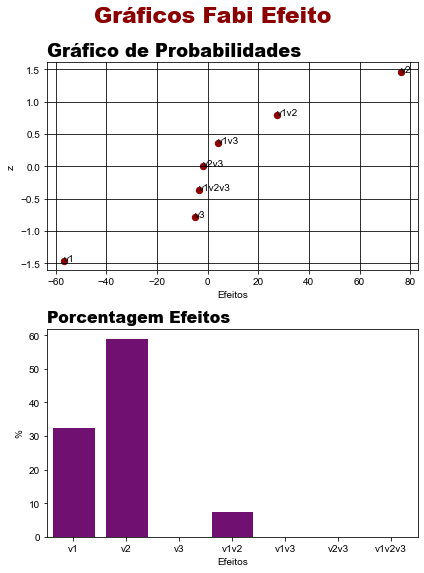

In [9]:
# uso do fabi_efeito para "objeto_1"
objeto_1.fabi_efeito()

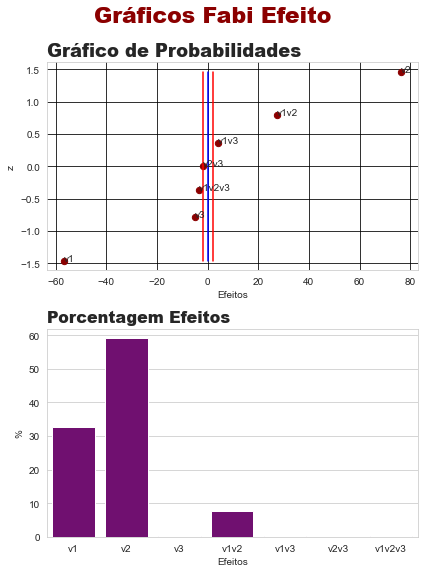

In [10]:
# uso do fabi_efeito para "objeto_2"
objeto_2.fabi_efeito()

## Interação do Microsoft Excel com o Python - Parte 2

Concluiu-se que nos gráficos de Porcentagem de Efeitos e Probabilidade de Efeitos as interações envolvendo a variável 3 são insignificantes. Com isso, por razão de praticidade, será utilizado o Excel novamente para retirar os efeitos significantes, consequentemente, a nova planilha gerará valores de réplicas que serão convertidos em médias aritméticas. Dessa forma, para finalizar o exemplo 1, utilizaremos a classe "*Fabi_efeito*" mais uma vez para verificar as significâncias dos efeitos.

In [12]:
# Leitura da planilha do exemplo 1 atualizada 
ex1_2 = pd.read_excel('exemplo1_p2.xlsx')
ex1_2

,1,2,12,media
0,-1,-1,1,136.60
1,-1,1,-1,143.30
2,1,-1,-1,177.95
3,1,1,1,132.50


In [13]:
# Matriz X para valores recalculados
X2 = ex1_2.iloc[:,:-1]
X2

,1,2,12
0,-1,-1,1
1,-1,1,-1
2,1,-1,-1
3,1,1,1


In [14]:
# Vetor y das réplicas
y2 = ex1_2['media']
y2

0    136.60
1    143.30
2    177.95
3    132.50
Name: media, dtype: float64

## Reaplicando o método *fabi_efeito()* para efeitos significavos para o *exemplo 1*

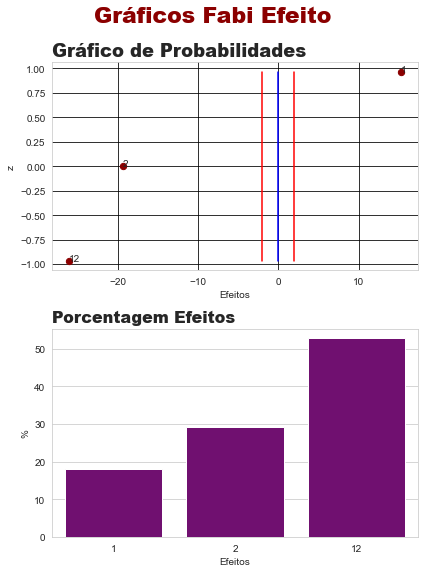

In [15]:
pde.Fabi_efeito(X2,y2,erro_efeito,t).fabi_efeito()

## Conclusão do Exemplo 1 

Com o recálculo dos efeitos somente com os valores significativos, observou-se que a variável não afetará significativamente na intensidade na fluorescência de antimônio na faixa de 10 à 30 minutos de retenção enquanto a variação dos valores de concentração de ácido clorídrico e de borohidreto de sódio podem variar a resposta negativamente ou positivamente. $^{[1]}$

# Exemplo 2 - Planejamento Fatorial Fracionário de Composto Central
O segundo exemplo se trata de um **planejamento fatorial fracionário** e de modelo de **composto central**, pois as variáveis são igualmente importantes. O experimento contém quatro variáveis, sendo que a quarta variável (Volume da fase aquosa) é resultante pelo produto das variáveis 1 (Massa polietileno glicol), variável 2 (Volume da fase aquosa) e variável 3 (Porcentagem de álcool polivinílico), ou seja, trata-se de um planejamento fracionário $2^{4-1}$. Assim, o experimento foi configurado para a construção dos **cálculo de contrastes**$^{[3][4]}$, onde os efeitos de primeira ordem são confundidos com os efeitos de terceira ordem, do mesmo modo que os efeitos de segunda ordem são confundidos entre si.$^{[1]}$

Em outras palavras, os **11 experimentos** efetuados será enviado para os cálculos da classe "*Fabi_efeito*" **7 contrastes**, estes: **1+234**, **2+134**, **3+124**, **4+123**, **12+34**, **13+24** e **14+23**.


## Importação de dados e criação de matrizes e vetores para o *exemplo 2*

Semelhante ao exemplo anterior, calcularemos os contrastes pelo Excel e importaremos para tratar os dados no Python. No entanto, há mudanças sobretudo sobre as respostas, que no caso temos empregado a este exemplo a resposta a ser minimizada, o Diâmetro, e a resposta a ser maximizada, a Distribuição. Isto significa que precisamos **construir dois vetores y** com os seus respectivos valores e os valores de **grau de liberdade** e **erro de um efeito** para as **réplicas do ponto central**.   

In [16]:
# Importando os dados do exemplo 2
ex2 = pd.read_excel('exemplo2.xlsx')
ex2.head()

,v1,v1 real,v2,v2 real,v3,v3 real,v4(1234),v4 real,Diâmetro,Distribuição,1+234,2+134,3+124,4+123,12+34,13+24,14+23
0,1,200,-1,1,-1,0.5,1,100,28.4,2.02,1,-1,-1,1,-1,-1,1
1,-1,50,-1,1,1,2.0,1,100,26.0,1.29,-1,-1,1,1,1,-1,-1
2,1,200,1,3,1,2.0,1,100,14.1,1.62,1,1,1,1,1,1,1
3,-1,50,1,3,-1,0.5,1,100,8.1,2.51,-1,1,-1,1,-1,1,-1
4,-1,50,1,3,1,2.0,-1,30,13.0,4.76,-1,1,1,-1,-1,-1,1


In [17]:
# Matriz X do exemplo 1
X = ex2.iloc[:-3,-7:]
X

,1+234,2+134,3+124,4+123,12+34,13+24,14+23
0,1,-1,-1,1,-1,-1,1
1,-1,-1,1,1,1,-1,-1
2,1,1,1,1,1,1,1
3,-1,1,-1,1,-1,1,-1
4,-1,1,1,-1,-1,-1,1
5,-1,-1,-1,-1,1,1,1
6,1,-1,1,-1,-1,1,-1
7,1,1,-1,-1,1,-1,-1


In [18]:
# vetor y 1 (Diâmetro)
y1 = ex2.iloc[:-3,-9]
y1

0    28.4
1    26.0
2    14.1
3     8.1
4    13.0
5    14.7
6     7.8
7     6.7
Name: Diâmetro, dtype: float64

In [19]:
# vetor y 2 (Distribuição)
y2 = ex2.iloc[:-3,-8]
y2

0    2.02
1    1.29
2    1.62
3    2.51
4    4.76
5    1.79
6    3.23
7    3.61
Name: Distribuição, dtype: float64

In [20]:
# réplicas do ponto central da resposta de diâmetro
yc1 = ex2.iloc[-3:,-9]
yc1

8     20.8
9     18.6
10    22.9
Name: Diâmetro, dtype: float64

In [21]:
# réplicas do ponto central da resposta de distribuição
yc2 = ex2.iloc[-3:,-8]
yc2

8     1.56
9     1.35
10    1.76
Name: Distribuição, dtype: float64

## Cálculo de Erro de um efeito e *t-value* para o ponto central
Novamente, será utilizado a **classe auxiliar CP** para os cálculos de erro de um efeito para cada resposta embora este processo poderia ser realizado propriamente pelo Excel. 

In [22]:
# Erro de um efeito para a resposta 1 (Diâmetro)
erro_efeito1 = pde.CP(y=yc1,k=4).erro_efeito()
erro_efeito1

0.6207074816512022

In [23]:
# Erro de um efeito para a resposta 2 (Distribuição)
erro_efeito2 = pde.CP(y=yc2,k=4).erro_efeito()
erro_efeito2

0.05918426968188233

In [24]:
# Graus de liberdade para a resposta 1 e 2 (Diâmetro e Distribuição)
t = pde.CP().invt(2)
t

4.302652729911275

## Aplicação do método *fabi_efeito()* para o exemplo 2

### Resultados para a resposta 1 (Diâmetro)

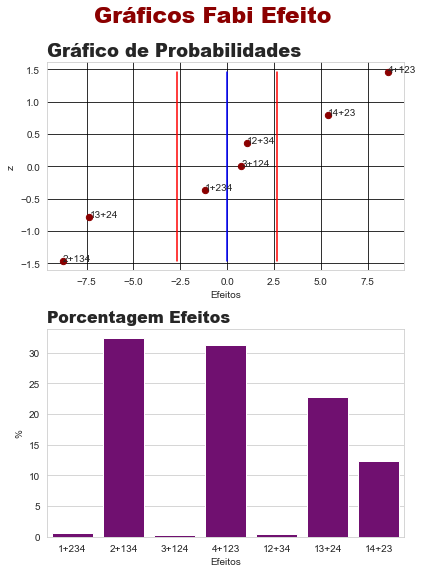

In [25]:
pde.Fabi_efeito(X,y1,erro_efeito1,t).fabi_efeito()

#### Resultados para a resposta 2 (Distribuição)

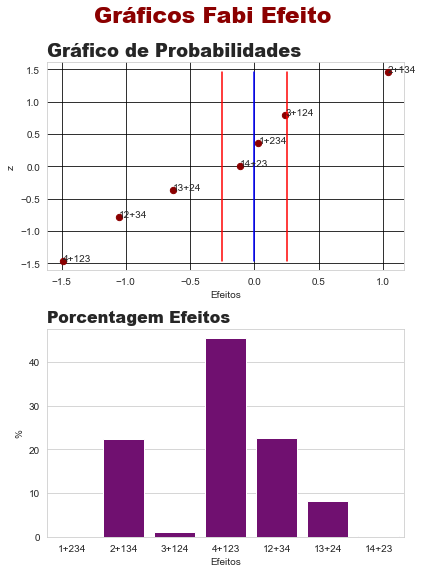

In [26]:
pde.Fabi_efeito(X,y2,erro_efeito2,t).fabi_efeito()

## Conclusão do Exemplo 2 
Nota-se que no da porcentagem de efeitos de ambas respostas, contrastes dos efeitos primários da variável 2 (2+134) e variável 4 (4+123) possuem significância em relação à 1 e 3. Também é possível verificar as insignificâncias dos contrastes primários dos efeitos 1 e 3 pelo gráfico de probabilidade, onde se encontram dentre o intervalo de confiança para 95% confiança. Outro fator importante a ser levantado observando os gráficos de "Porcentagem Efeitos" é que as variáveis 1 e 3 devem estar em níveis opostos das variáveis 4 e 2, respectivamente. $^{[1]}$

# Exemplo 3 - Planejamento Fatorial Doehlert e Modelo de Regressão 

Vamos dar continuidade com os resultados obtidos pelo exemplo 1, os resultados da classe *Fabi_efeito* apontou que a variável 1 (concentração molar de ácido clorídrico) e variável 2 (concentração de borohidreto de sódio) eram significantes para a variação da intensidade fluorescência de antimônio. Então, para obter melhores condições de trabalho, este experimento foi reconfigurado para um **Planejamento Fatorial do tipo Doehlert**$^{[5]}$, isto é, as variáveis 1 e 2 foram testadas em uma quantidade diferente de níveis entre si. Assim, a variável 1 foi configurada em 3 níveis (-0.866, 0, 0.866) enquanto a variável 2 em 5 níveis (-1, -0.5, 0, 0.5, 1).

## Classe Regression2
Esta classe é responsável por gerar um modelo de regressão e realizar o seu ajuste através da *analisys of variance* (ANOVA), de modo que será calculado os valores dos coeficientes da equação do modelo e seus respectivos erros, os erros por sua vez são gerados após a verificação do *teste F*, onde a construção do intervalo de confiança será dado pela média quadrática dos resíduos, quando não há falta de ajuste do modelo, ou pela média quadrática de falta de ajuste, quando há falta de ajuste. Assim, uma vez gerado os resultados, o usuário terá que avaliar os coeficientes insignificantes para o modelo para, posteriormente, excluí-los.

### Parâmetros obrigatórios no método *regression2()*

#### Matriz X (*X*):
$\quad$  Valores codificados dos coeficientes do modelo.

#### Vetor y (*y*) :
$\quad$ Valores das respostas experimentais  

#### Soma Quadrática do Erro Puro (*SSPE*):
$\quad$ A soma quadrática é obtida através dos valores das réplicas do ponto central decrita pela equação 4. A classe *CP* também fornece um método para o cálculo do atributo. Utilize o comando `pde.CP(valores_centrais).SSPE()`. Para saber mais use `help(pde.CP.SSPE())`.

$$
SQ_{ep}=\frac{\sum{(y_{i}-\bar{y})^2}}{n-1}\qquad\qquad\qquad\qquad\qquad\qquad\quad\;\;\text{(Eq. 4)}
$$

#### Graus de Liberdade (*df*):
$\quad$ Graus de liberdade do ponto central, ou seja, $Nº_{Replicas}-1$.

###  Métodos auxiliares no método *regression2()*
O método `pde.Regression2().regression2()` possui alguns atributos no momento de instanciar a classe que são opcionais  de automação do tratamento de dados, segue as suas descrições:

#### self_turning:
$\quad$O `self_turning`, que por padrão está configurado como `False`, este quando configurado como `True`, definirá se o modelo possui falta de ajuste automaticamente. O seu algoritmo é definido com um comando de seleção onde verifica a seguinte condição:

$$
\:\:\text{Teste}\:F_{2}\:<\:F2_{tabelado}\;ou\;F1_{tabelado}\:<\:\text{Teste}\:F_1
$$
$Onde,$
$$
\text{Teste}\:F_{1}=\frac{MS_{Reg}}{MS_{Res}}\quad\:e\quad\text{Teste}\:F_{2}=\frac{MS_{LoF}}{MS_{ep}}
$$

Tendo em vista isso, atente-se se este comando se enquadra em dados em contextos que necessitam de uma análise mais cautelosa.  

#### auto (Não recomendável): 
$\quad$O parâmetro `auto` também é do tipo booleano, que por padrão está configurado como `False`, este comando quando configurado como `True`, excluirá os coeficientes insignificantes e também os tornará nulo estes coeficientes na lista gerada através do método auxiliar `pde.Regression2.model_coefients()`. No entanto, o seu uso não é recomendável quando existe réplicas ao excluir colunas dos dados, pois ainda é inexistente a função que gera os valores médios das respostas das réplicas. Assim, no caso do exemplo 3 do Tutorial da Química Nova é possível utilizar este comando, pois se trata de um planejamento fatorial de Doerlert que não possui réplicas ao eliminar o coeficiente insignificante, não alterando valores das respostas e do grau de liberdade dos pontos centrais. 

### Métodos auxiliares da classe *Regression2*

A classe `Regression2` fornece métodos auxiliares que server para gerar alguns resultados a parte que é fornecido pelo o método mestre, de modo que são complementares para os atributos da classe *Super_fabi*. Segue suas descrições abaixo:

#### *model_coeficients()*:
$\quad$O `model_coeficients` retorna uma lista com os valores dos coeficientes do modelo, este é uma ótima ferramenta quando queremos determinar a condição ótima experimental através dos gráficos de superfície e contorno do modelo fornecidos pela classe *Fabi_efeito*.

#### *show_ci()*:
$\quad$ Semelhante ao método anterior, este retorna os valores do intervalo de confiança dos coeficientes através de uma lista.

#### *dict_coefs_ci()*
$\quad$ Retorna uma lista contendo dicionários, sendo que as chaves são os coeficientes e os respectivos valores: `coef, coef + ci e coef - ci]`. 

#### *save_dataset()*
$\quad$ Cria um arquivo chamado *dataset.xlsx* no diretório contendo três páginas: a primeira, *ANOVA*, a tabela Anova gerada pelo método *regression2*; segundo, *coefs_ci*, os valores dos coeficientes do modelo e também os seus valores somados e subtraídos pelo intervalo de confiança; terceiro, *exp_pred*, os valores da resposta (vetor y) e os respectivos valores previstos pelo modelo.

## Importação de dados e criação da matriz X e vetor y no Microsoft Excel
Semelhante aos procedimentos realizados no *exemplo 1* e *exemplo 2*, utilizaremos o Microsoft Excel para construir a matriz X e vetor y devido toda praticidade que o software o fornece, entretanto este passo é possível realizar aqui no Python utilizando as técnicas com o módulo do Pandas que foram apresentados na *Seção 5*.


In [3]:
# Importar dados do exemplo 3 
ex3 = pd.read_excel('exemplo3.xlsx')
ex3

,v1,v1 real,v2,v2 real,fluor Sb,b0,b1,b2,b11,b22,b12
0,0.866,5,0.5,1.8,367,1,0.866,0.5,0.749956,0.25,0.433
1,0.866,5,-0.5,1.4,660,1,0.866,-0.5,0.749956,0.25,-0.433
2,0.000,4,-1.0,1.2,762,1,0.000,-1.0,0.000000,1.00,0.000
3,-0.866,3,-0.5,1.4,787,1,-0.866,-0.5,0.749956,0.25,0.433
4,-0.866,3,0.5,1.8,434,1,-0.866,0.5,0.749956,0.25,-0.433
5,0.000,4,1.0,2.0,167,1,0.000,1.0,0.000000,1.00,0.000
6,0.000,4,0.0,1.6,651,1,0.000,0.0,0.000000,0.00,0.000
7,0.000,4,0.0,1.6,643,1,0.000,0.0,0.000000,0.00,0.000
8,0.000,4,0.0,1.6,652,1,0.000,0.0,0.000000,0.00,0.000


In [4]:
# Matriz X do exemplo 3 
X = ex3.iloc[:, -6:]
X                                  

,b0,b1,b2,b11,b22,b12
0,1,0.866,0.5,0.749956,0.25,0.433
1,1,0.866,-0.5,0.749956,0.25,-0.433
2,1,0.000,-1.0,0.000000,1.00,0.000
3,1,-0.866,-0.5,0.749956,0.25,0.433
4,1,-0.866,0.5,0.749956,0.25,-0.433
5,1,0.000,1.0,0.000000,1.00,0.000
6,1,0.000,0.0,0.000000,0.00,0.000
7,1,0.000,0.0,0.000000,0.00,0.000
8,1,0.000,0.0,0.000000,0.00,0.000


In [5]:
# Vetor y do exemplo 1
y = ex3.iloc[:,4]
y

0    367
1    660
2    762
3    787
4    434
5    167
6    651
7    643
8    652
Name: fluor Sb, dtype: int64

In [6]:
# Réplicas do ponto central 
yc = ex3.iloc[-3:,4]
yc

6    651
7    643
8    652
Name: fluor Sb, dtype: int64

In [7]:
# Soma quadrática do erro puro 
SSPE = pde.CP(yc).SSPE().round(1)
SSPE

48.7

## Aplicação do método *regression2()*
Uma vez importado os dados codificados dos coeficientes, resposta experimental e determinado SQEP e seu grau de liberdade, vamos aplicar o método mestre da classe *Regression2* para construir o modelo e definir os coeficientes insignificantes.

In [8]:
# Instanciando a classe Regression2 
reg = pde.Regression2(X,y,SSPE,2,self_check=True)

                                             TABELA ANOVA                                             
-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
+------------------+----------------------+------------------------+-----------------------+------------+
| Parâmetro        | Soma Quadrática (SQ) | Graus de Liberdade(GL) | Média Quadrática (MQ) | Teste F1   |
+------------------+----------------------+------------------------+-----------------------+------------+
| Regressão:       | 332293               | 5                      | 66459                 | 413.5      |
+------------------+----------------------+------------------------+-----------------------+------------+
| Resíduo:         | 482.2                | 3                      | 160.72                | 413.5      |
+------------------+----------------------+------------------------+-----------------------+------------+
| Total:           | 332776               | 8   

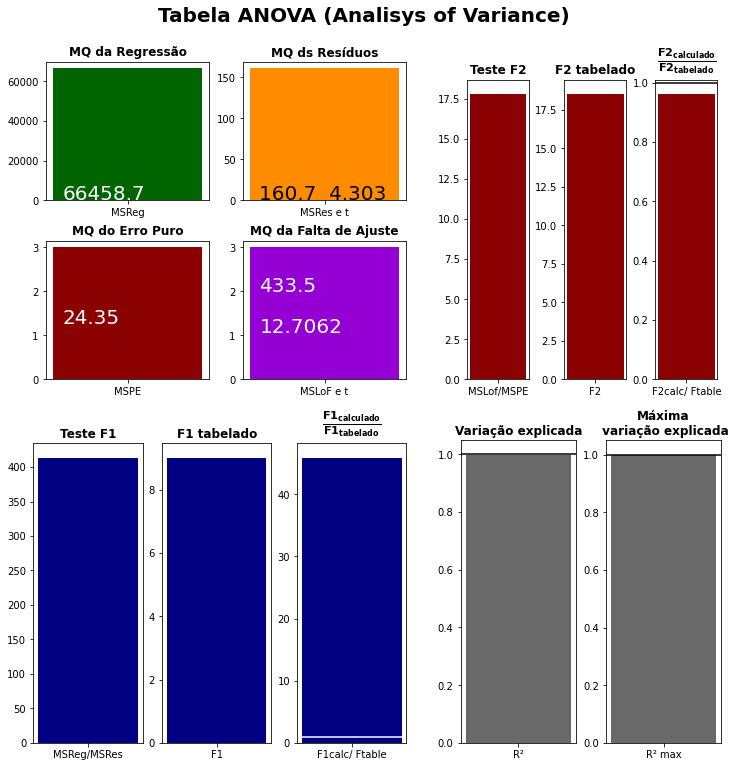

<IPython.core.display.Latex object>

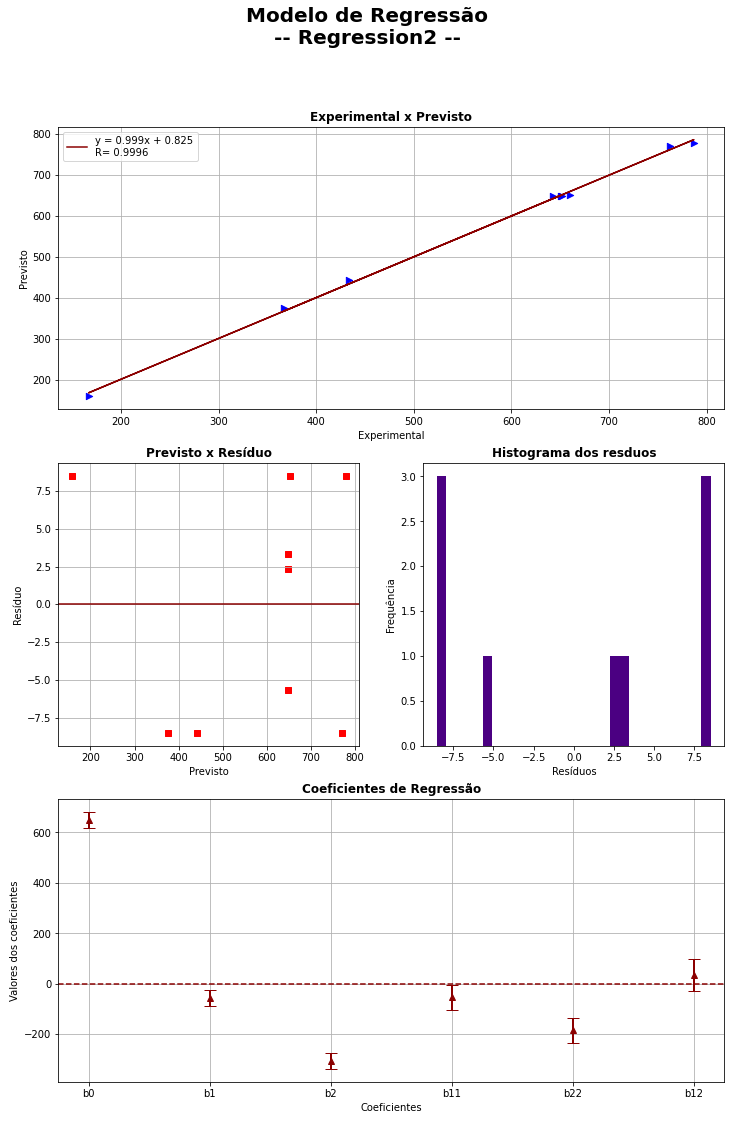

Operação finalizada! Verifique os resultados em seu diretório.


In [9]:
# Aplicando o método regression2
reg.regression2()

In [9]:
# Exportando dados do modelo usando o método save_dataset
reg.save_dataset()

In [11]:
X = X.drop(['b12'],axis=1)
X.head()

,b0,b1,b2,b11,b22
0,1,0.866,0.5,0.749956,0.25
1,1,0.866,-0.5,0.749956,0.25
2,1,0.000,-1.0,0.000000,1.00
3,1,-0.866,-0.5,0.749956,0.25
4,1,-0.866,0.5,0.749956,0.25


### Aplicando *regression2* para o *exemplo 3* recalculado

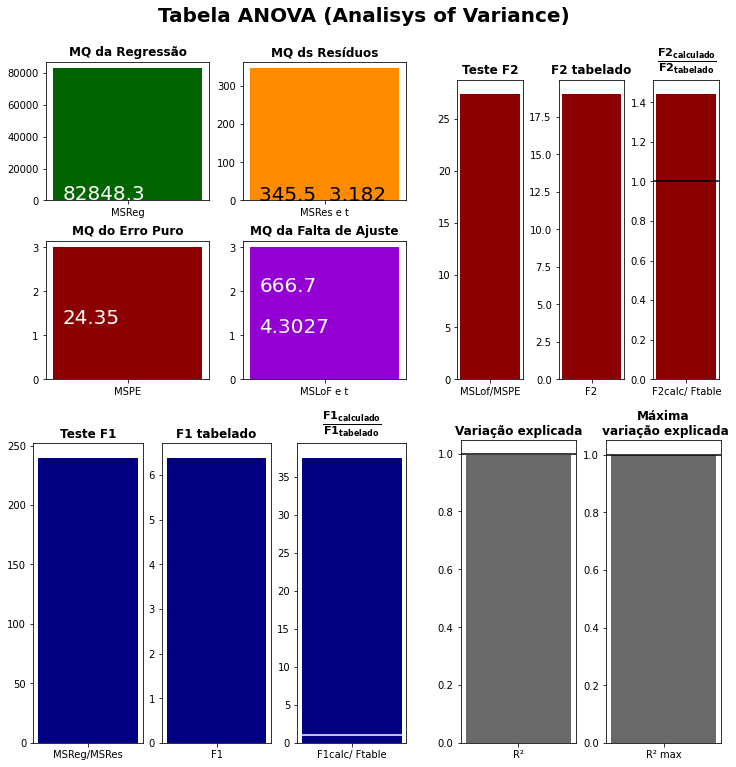

<IPython.core.display.Latex object>

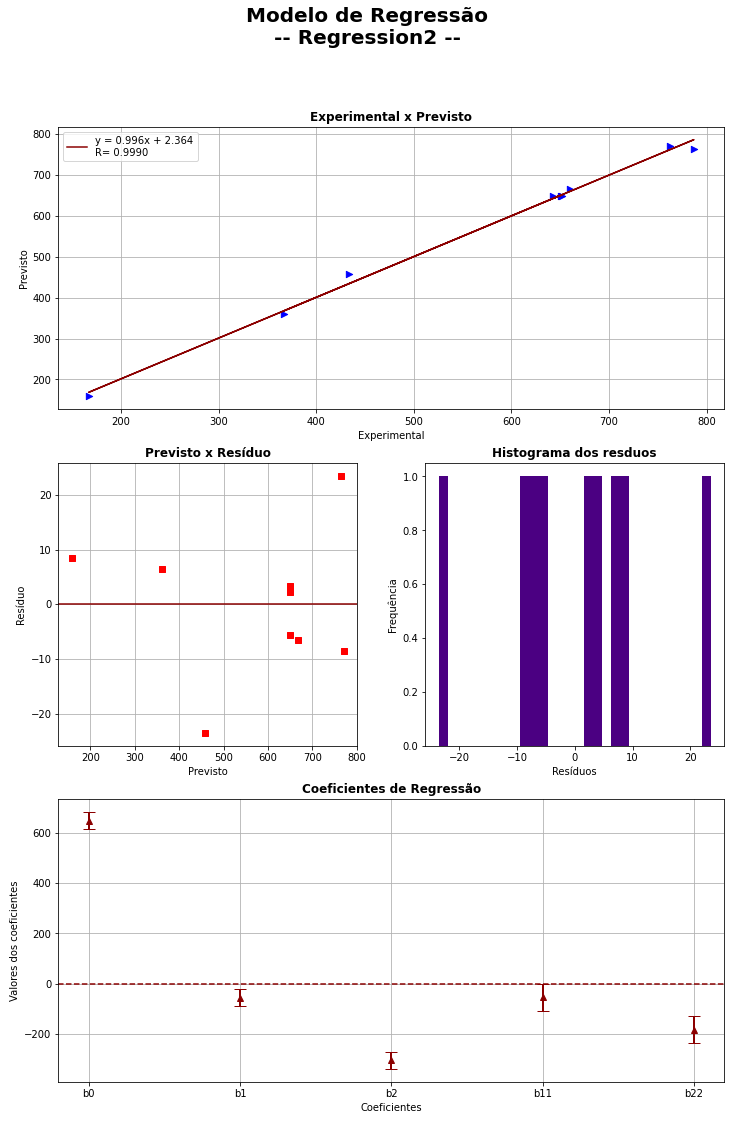

Operação finalizada! Verifique os resultados em seu diretório.


In [12]:
pde.Regression2(X,y,SSPE,2,self_check=True).regression2()

### Utilizando o método auxiliar *auto* para o recalculo do modelo 
Como a implementação desta ferramenta ainda está em desenvolvimento, o seu uso não recomendável para situações para planejamento fatorial de composto central, pois neste modelo réplicas são geradas, alterando valores de respostas e do grau de liberdade do ponto central.

In [14]:
reg2 = pde.Regression2(X,y,SSPE,2,self_check=True,auto=True)

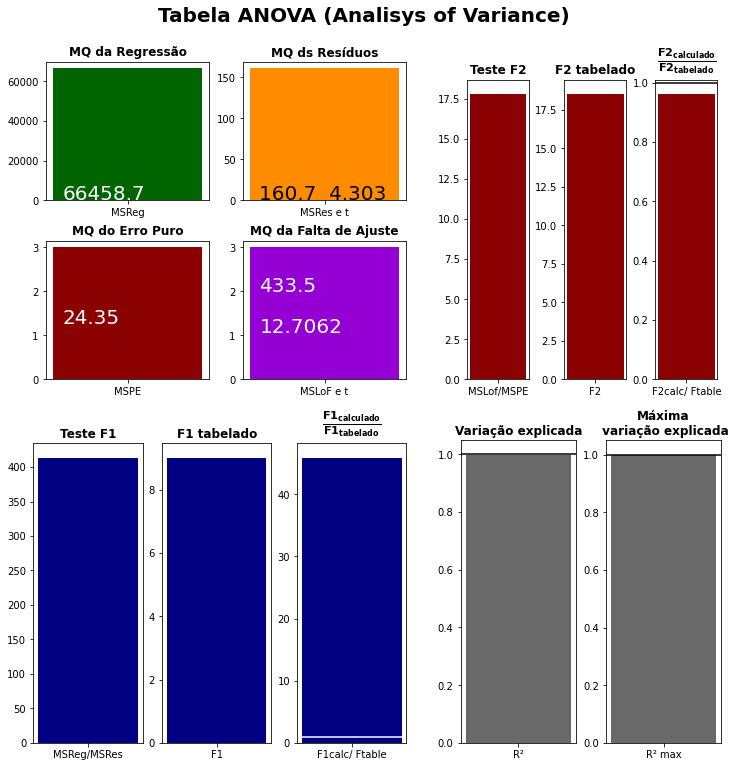

<IPython.core.display.Latex object>

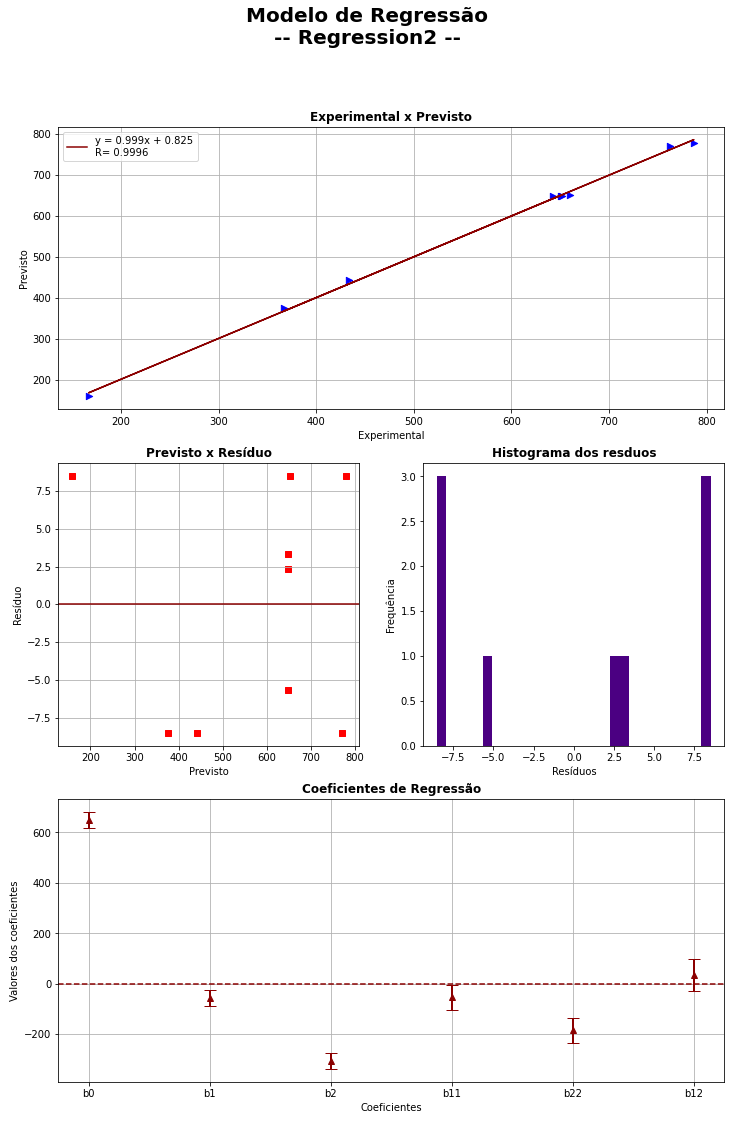

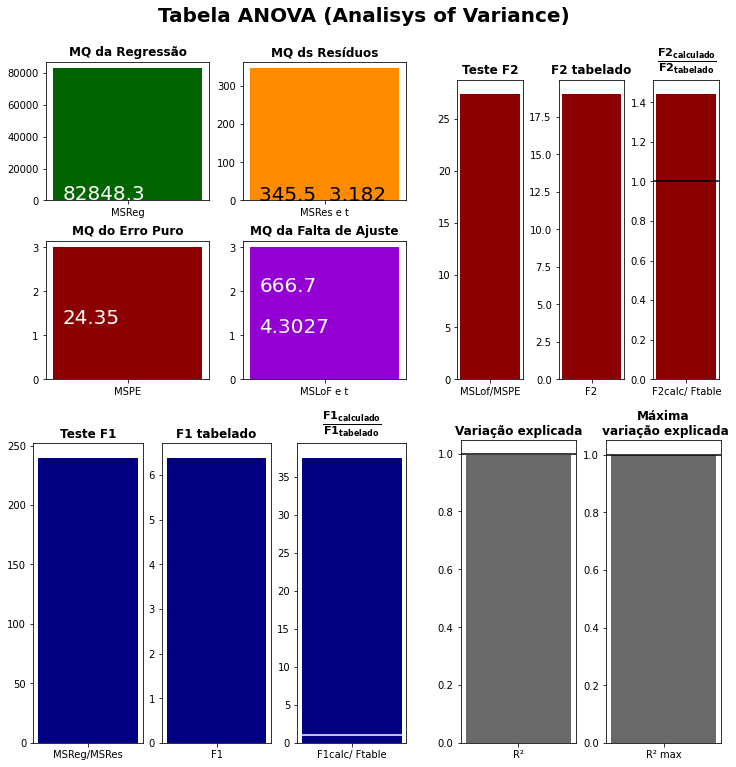

<IPython.core.display.Latex object>

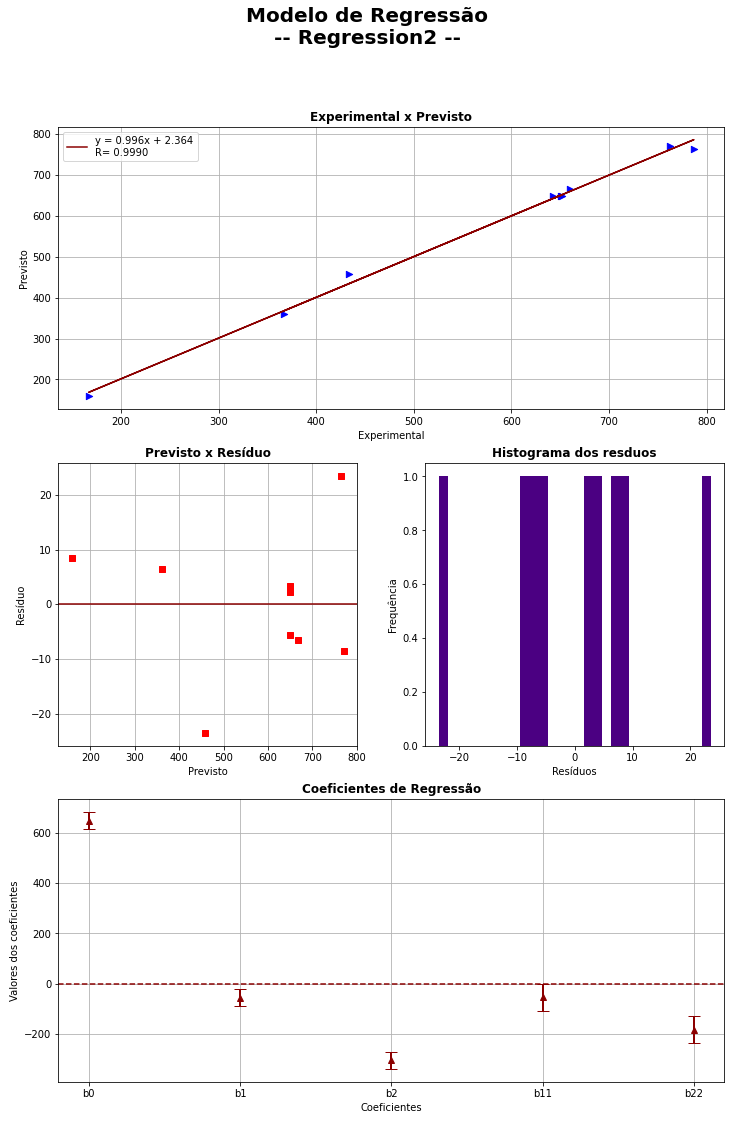

Operação finalizada! Verifique os resultados em seu diretório.


In [15]:
reg2.regression2()

## Conclusão do modelo de regressão do Exemplo 3 
O primeiro de modelo de regressão realizado do exemplo 3 foi avaliado que o **modelo não possui falta de ajuste**, uma vez que o valor de F1 tabelado foi de 9.013 para 95% de confiança, de modo que a sua relação com valor do **teste F1** $\big(\frac{MS_{Reg}}{MS_{Res}}\big)$ foi acima de 40. Outro fator determinante é o valor do **teste F2** $\big(\frac{MS_{LoF}}{MS_{ep}}\big)$ foi menor que o valor do F2 tabelado também calculado para 95% de confiança. Tendo em vista o gráfico de **Coeficientes de Regressão**, pode-se concluir que o coeficiente **b12** é insignificante para o modelo e ao recalcular com os valores significantes ao modelo, o **modelo demonstrou não ter falta de ajuste** embora o **teste F2 não confirmou** esta avaliação, pois o valor do teste F2 foi maior que o F1 tabelado.


# Exemplo 3 - Gráficos de superfície e de contorno

Com o modelo obtido pela rotina *Regression2*, é possível determinar as condições experimentais a melhor resposta da fluorescência de antimônio através da derivada parcial ou pela visualização dos gráficos de superfície ou de contorno. Para isso, a biblioteca *pde.py* inclui a classe *Super_fabi* que foi adaptada da rotina "*fabi_efeito*" do Octave.

## Classe *Super_fabi*
Responsável por retornar os gráficos de contorno e de superfície juntamente com a equação do modelo, valores codificados e reais para o valor máximo de sinal. Diferente da classe *Regression2* esta não possui parâmetros auxiliares, contendo no total 9 atributos obrigatórios, estes são: 

#### *coefs*:
$\quad$Coeficientes do modelo de regressão que precisa ser *type list*, estes valores podem ser acessados com o método auxiliar *Regression2.model_coeficients()*.

#### realmax1 e realmin1
$\quad$Valor real máximo e mínimo para a variável 1, respectivamente.

#### realmax2 e realmin2
$\quad$Valor real máximo e mínimo para a variável 2, respectivamente.

#### codmax1 e codmin1
$\quad$Valor codificados máximo e mínimo para a variável 1, respectivamente.

#### codmax2 e codmin2
$\quad$Valor codificados máximo e mínimo para a variável 1, respectivamente.

### Principais métodos da classe *Super_fabi*

A classe *Super_fabi* não foi totalmente encapsulada com métodos privados para que p usuário tenha acesso aos valores gerados para a construção dos gráficos, assim há diversos métodos exposto que não serão apresentados nesta apostila. 

#### *superficie(matrix_X = None, vector_y = None, scatter=False)*:
$\quad$ Método mais importante da rotina, uma vez que este gera os resultados esperados pela classe, ou seja, a criação dos gráficos de superfície e de contorno juntamente com a equação do modelo e a condição experimental valores de resposta máxima. Este método possui um parâmetro auxiliar chamado de `scatter`, que está configurado por padrão por `False`, quando este recebe `True` e é informado um *dataframe* com os valores codificados dos coeficientes *b1* e *b2* através do parâmetro `matrix_X` e as respostas experimentais pelo parâmetro `vector_y` será construído os pontos experimentais do planejamento fatorial no gráfico de contorno. 

#### *z(meshgrid=None, x=None,  y=None, manual=False)*:
$\quad$ Este retorna os valores previstos pelo modelo de três maneiras: primeiro, através de um vetor com 100 itens quando `meshgrid=False`; segundo, através de uma matriz com 100 colunas e 100 linhas quando `meshgrid=True`; terceiro, um único valor que é calculado manualmente pelo modelo, para isso, mantenha o parâmetro *meshgrid* em `None` e configure `manual=True` e também os valores codificados de x e y que será calculado pela equação do modelo. 

### *Property's* da classe *Super_fabi* 
Embora o assunto programação orientada a objetos não foi tratada nesta playlist, este tópico será abordados brevemente nesta seção. A *property's* de uma classe são atributos ou atributos modificados que são facilmente acessados, por exemplo na biblioteca Pandas quando queremos acessar as dimensões de um dataframe e usamos o comando shape da seguinte maneira, `pandas.dataframe.shape`. Note que não precisamos colocar os parênteses que comumente estão presentes em métodos. Tendo em vista isso, segue abaixo os valores que podem ser acessados pela classe:

#### *maxcod* 
$\quad$ Retorna valores das coordenadas do sinal máximo para as variáveis codificadas.

#### *maxreal*
$\quad$ Retorna valores das coordenadas do sinal máximo para as variáveis reais.

#### *zmax*
$\quad$ Retorna o valor do sinal máximo do modelo.


## Obtendo valores de coeficientes através da *Regression2* 
Lembre-se que para os coeficientes insignificantes tem que ser igualado à zero na lista que será recebido pela classe *Super_fabi*, então para obter estes valores, será utilizado o método auxiliar *model_coeficients()*, fique atento e deixe o atributo `auto` em `False` para ser analisado todos os coeficientes do modelo.

In [10]:
# Coeficientes do modelo com valores nulos aos coeficientes insignificantes
coefs = pde.Regression2(X,y,SSPE,2).model_coefients()
coefs

[648.66667, -56.00462, -306.0, -54.16984, -184.16667, 0]

## Aplicando o método superficie() para o exemplo 3
Agora basta instanciar a classe *Super_fabi* e inserir todos os comando necessários.

In [12]:
#Instanciando a classe Super_fabi
s = pde.Super_fabi(coefs,
               5,
               3,
               2,
               1.2,
               0.866,
               -0.866,
               1,
               -1)

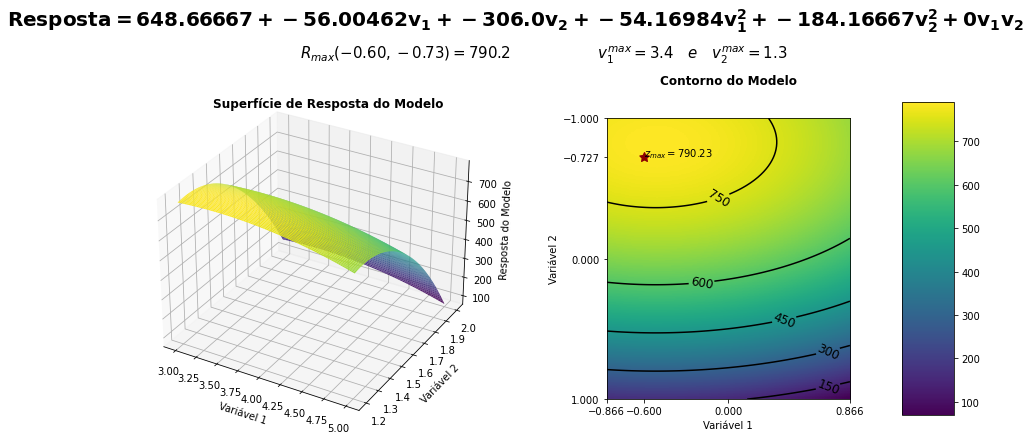

In [13]:
# aplicando o método superficie
s.superficie()

Como mencionado anteriormente, o método *superficie()* contém o recurso *scatter*, paramêtro que plota gráfico com os pontos experimentais realizados. Para ativá-lo, configuramos `scatter=True` e inserimos valor de `matrix_X`, que é os valores codificados dos coeficientes lineares, e `vector_y`, respostas experimentais.

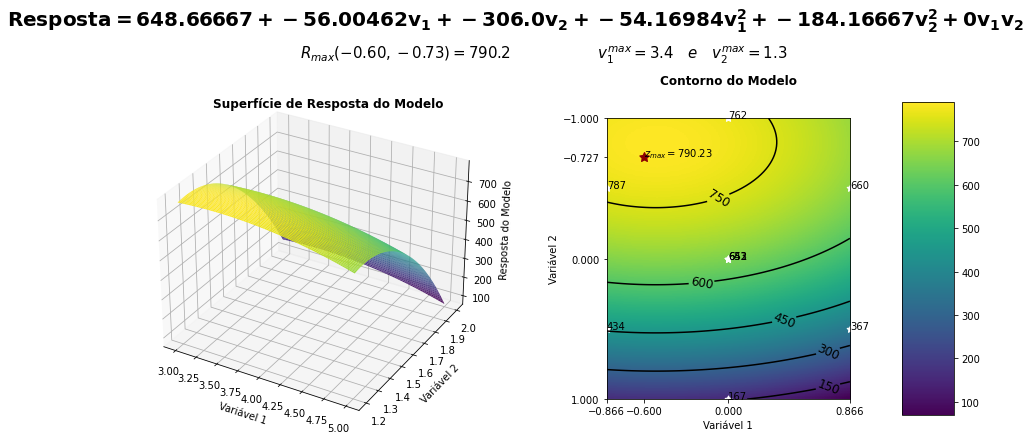

In [14]:
s.superficie(X[['b1','b2']],y,True)

## Aplicando derivadas parciais no exemplo 3
Os valores destacados nos gráficos de superfície e de contorno foram determinados através da matriz *meshgrid*, trata-se de uma matriz com 1000 colunas e 1000 linhas, assim o valor máximo de resposta foi encontrado utilizando o método *max()* do módulo numpy e os respectivos valores da variável 1 e variável 2 foram com o uso de index gerados na matriz de resposta. 

Para obter as condições ideais de experimentação através das derivadas, será utilizado um método auxiliar da classe *Super_fabi* chamado *solver_diff()*. Os coeficiente serão determinados a partir do sistema de equações formado com a derivação parcial da equação do modelo, dessa maneira, os coeficientes que descrevem as condições ideais para experimentação será através das raízes encontradas. Por fim, o valor da resposta máxima será o resultado previsto pelo modelo utilizando os coeficientes encontrados no cálculo. Outro importante ser mencionado é o método de resolução do sistema de equações, que no caso do método *solver_diff()* será por meio das propriedades de matrizes, a biblioteca disponibiliza para o planejamento fatoriais envolvendo 2,3 e 4 variáveis.  
$Temos,\:para\:k=2:$
$$\begin{pmatrix}v_1^{max}\\v_2^{max}\\\end{pmatrix}\:=\:\begin{pmatrix}2b_{11}&b_{12}\\b_{21}&2b_{22}\\\end{pmatrix}^{-1}\begin{pmatrix}-b_{1}\\-b_{2}\\\end{pmatrix}$$

$para\:k=3:$
$$\begin{pmatrix}v_1^{max}\\v_2^{max}\\v_3^{max}\\\end{pmatrix}\:=\:\begin{pmatrix}2b_{11}&b_{12}&b_{13}\\b_{12}&2b_{22}&b_{23}\\b_{13}&b_{23}&2b_{33}\end{pmatrix}^{-1}\begin{pmatrix}-b_{1}\\-b_{2}\\-b_{3}\\\end{pmatrix}$$

$E\:por\:fim,para\:k=4:$
$$\begin{pmatrix}v_1^{max}\\v_2^{max}\\v_3^{max}\\v_4^{max}\\\end{pmatrix}\:=\:\begin{pmatrix}2b_{11}&b_{12}&b_{13}&b_{14}\\b_{12}&2b_{22}&b_{23}&b_{24}\\b_{13}&b_{23}&2b_{33}&b_{34}\\b_{14}&b_{24}&b_{34}&2b_{44}\end{pmatrix}^{-1}\begin{pmatrix}-b_{1}\\-b_{2}\\-b_{3}\\-b_{4}\\\end{pmatrix}$$

In [22]:
s.solver_diff(printf=True)

<IPython.core.display.Latex object>

Nota-se um ajuste do valores, apontando que o método da derivada parcial apresenta uma condição experimental mais precisa em relação ao método adotado, por aproximação, pela função *superficie()*.

## Conclusão dos gráficos de superfície e contorno do Exemplo 3
Após construir o modelo de regressão e construído os gráficos de superfície e contorno do modelo, foi previsto a condição experimental ideal relativas à intensidade de fluorescência de antimônio, portanto, a concentração de antimônio seja máxima. Assim, para atingir a intensidade de fluorescência de antimônio máximo de **790.2** é necessário empregar a concentração molar de ácido clorídrico e porcentagem (m/v) de borohidreto de sódio de **3.4 mol/L** e **1.3 %**, respectivamente.

# Exemplo 4 - Planejamento Fatorial Box-Behnken
O exemplo 4 utiliza o planejamento fatorial incompleto ou o planejamento fatorial Box-Behnken, onde foi empregado de 4 variáveis em relação do rendimento de benzaldeído com o objetivo de encontrar a condição ideal para atingir a resposta máxima. Para isso, vai ser levado em consideração a constante (*b0*), coeficiente lineares (*b1*, *b2*, *b3*, *b4*), coeficientes quadráticos (*b11*, *b22*, *b33*, *b44*) e coeficientes de interação de primeira ordem (*b12*, *b13*, *b14*, *b23*, *b24*, *b34*).

## Importação de dados e criação da matrix X e vetor y no Microsoft Excel

In [23]:
#Importando dados do exemplo 4 
ex4 = pd.read_excel('exemplo4.xlsx')
ex4.head()

,v1,v1 real,v2,v2 real,v3,v3 real,v4,v4 real,Rend (%),b0,...,b11,b22,b33,b44,b12,b13,b14,b23,b24,b34
0,-1,0.7,-1,50,0,4,0,20,73.00,1,...,1,1,0,0,1,0,0,0,0,0
1,1,0.9,-1,50,0,4,0,20,88.15,1,...,1,1,0,0,-1,0,0,0,0,0
2,-1,0.7,1,75,0,4,0,20,80.98,1,...,1,1,0,0,-1,0,0,0,0,0
3,1,0.9,1,75,0,4,0,20,90.82,1,...,1,1,0,0,1,0,0,0,0,0
4,0,0.8,0,66,-1,3,-1,15,84.55,1,...,0,0,1,1,0,0,0,0,0,1


In [24]:
# matriz X do exemplo 4
X = ex4.iloc[:,-15:]
X.head()

,b0,b1,b2,b3,b4,b11,b22,b33,b44,b12,b13,b14,b23,b24,b34
0,1,-1,-1,0,0,1,1,0,0,1,0,0,0,0,0
1,1,1,-1,0,0,1,1,0,0,-1,0,0,0,0,0
2,1,-1,1,0,0,1,1,0,0,-1,0,0,0,0,0
3,1,1,1,0,0,1,1,0,0,1,0,0,0,0,0
4,1,0,0,-1,-1,0,0,1,1,0,0,0,0,0,1


In [25]:
# vetor y do exemplo 4 
y = ex4['Rend (%)']
y.head()

0    73.00
1    88.15
2    80.98
3    90.82
4    84.55
Name: Rend (%), dtype: float64

In [26]:
# valores do ponto central 
yc = y[-5:]
yc

24    91.61
25    91.70
26    93.00
27    92.11
28    93.00
Name: Rend (%), dtype: float64

## Aplicando Regression2 para o exemplo 4
Semelhante ao exemplo 3, será aplicado o método *regression2* para verificar o modelo de regressão e posteriormente definir os coeficientes do modelo e o intervalo de confiança do modelo.

In [27]:
# Instanciando a classe Regression2 para os dados do exemplo 4
reg = pde.Regression2(X,y,pde.CP(yc).SSPE(),4,self_check=True)

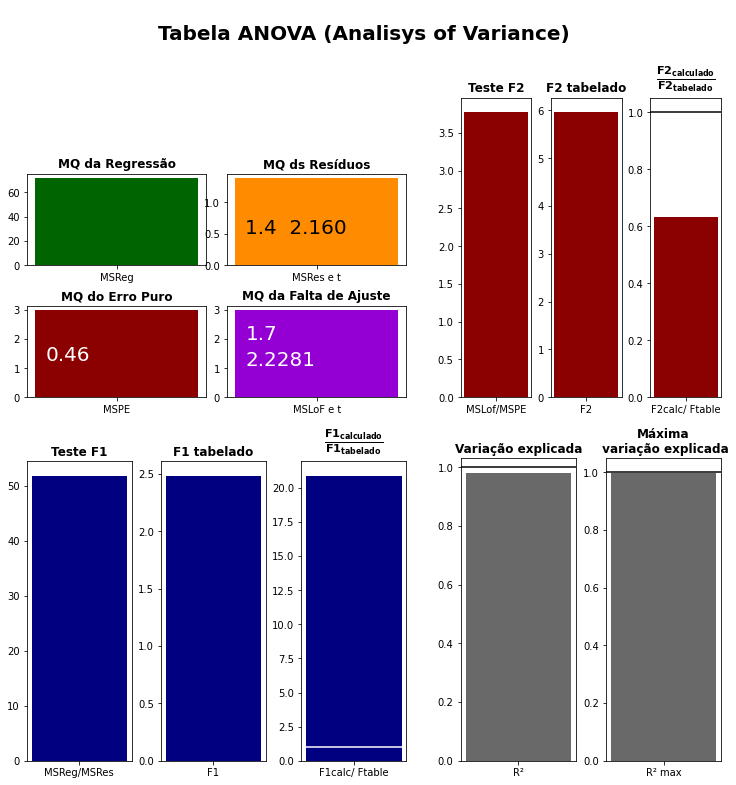

<IPython.core.display.Latex object>

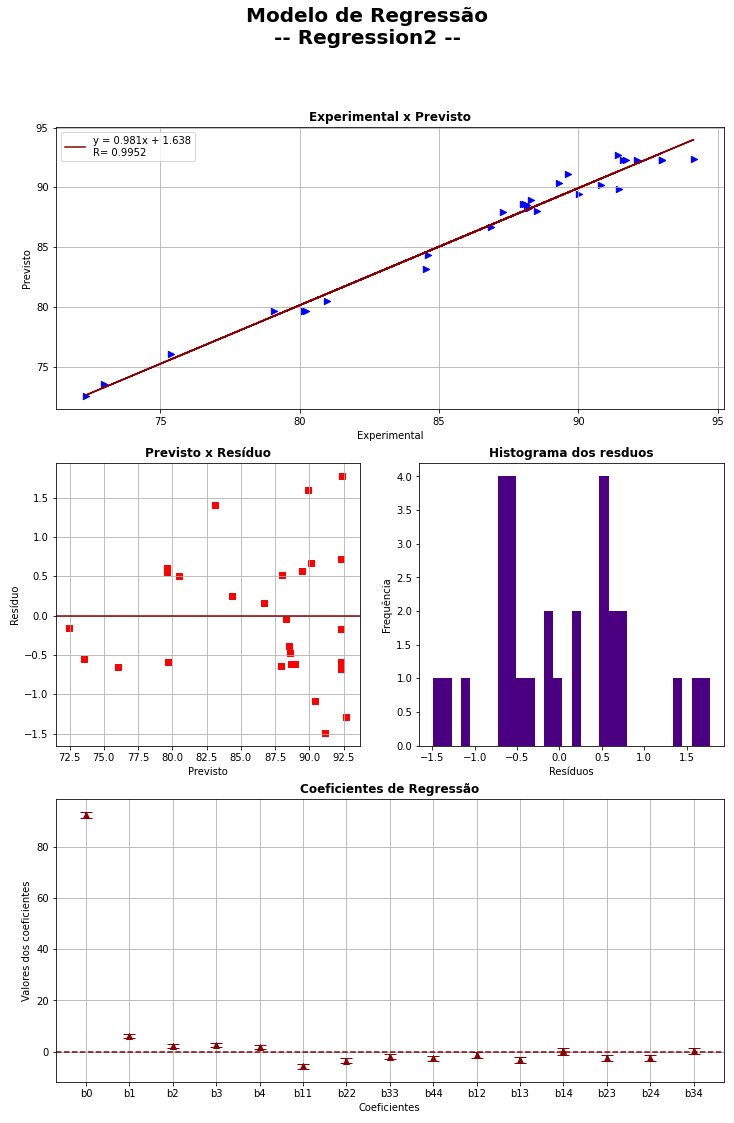

Operação finalizada! Verifique os resultados em seu diretório.


In [28]:
reg.regression2()

In [29]:
coefs = reg.model_coefients()
coefs

## Cálculo das derivadas parciais no exemplo 4
Semelhante ao exemplo 3, será utilizado o método *solver_diff()* dentro da classe *Super_fabi*. 

In [30]:
pde.Super_fabi(coefs).solver_diff(k=4,printf=False)

,Resultados
b1,0.442321
b2,-0.053574
b3,0.380348
b4,0.411253
Resposta,94.5297923750325


Para valores reais, observamos que os resultados obtidos no Python com as derivadas parciais foram equivalentes ao método realizado pelo Octave. Segue quadro de comparação apresentado pelo Tutorial da Química Nova:
    

In [31]:
# comparando valores entre métodos de cálculo de valores de máximos críticos do modelo.
pd.DataFrame({'V1 (g)':[.84,.84,.84,.84],'V2 (%)':[62,65,62,66],'V3(h)':[4.4,4.4,4.4,4.4],'V4 (mL)':[22, 22,22,22.3], 'Resposta Prevista':[95.5,94.5,94.5,94]}, index=['Derivada.P (Python)','Solver GRD', 'Derivada.P (Octave)','Condição Autores'])

,V1 (g),V2 (%),V3(h),V4 (mL),Resposta Prevista
Derivada.P (Python),0.84,62,4.4,22.0,95.5
Solver GRD,0.84,65,4.4,22.0,94.5
Derivada.P (Octave),0.84,62,4.4,22.0,94.5
Condição Autores,0.84,66,4.4,22.3,94.0


## Conclusão do Exemplo 4 
Após de descodificar os resultados do método *solver_diff()*, obteu-se as condições ideias de experimentação para as veriáveis 1, 2, 3 e 4, assim os valores reais,respectivamente, são: 0.84 g de massa de catalisador, 65% concentração de peróxido de hidrogênio em álcool benzílico, 4.4 horas de tempo de reação e 22 mL de água. Dessa maneira, obtendo-se o rendimento previsto de 94.5% para a produção de benzaldeído.


# Material Suplementar
- **Playlist 8: Tutorial Química Nova - Introdução**
\
https://www.youtube.com/watch?v=ai6mb6KENmw&list=PL4CuftF4l_fBDpo7b57Hn95sGEtkyChvA 

- **Playlist 9: Tutorial Química Nova - Exemplo 1**
\
https://www.youtube.com/watch?v=mVFS_wdtj6I&list=PL4CuftF4l_fDA0BXsxRGZoE9s0j7yPZ30 

- **Playlist 10: Tutorial Química Nova - Exemplo 2**
\
https://www.youtube.com/watch?v=iqTaAYSS0Fk&list=PL4CuftF4l_fCFGmzWcfpdY33r0Focz8jI 

- **Playlist 11: Tutorial Química Nova - Exemplo 3**
\
https://www.youtube.com/watch?v=y6Vdm0WBRiU&list=PL4CuftF4l_fAbKkSS1i-eBGFcPhgMfIyJ 

- **Playlist 12: Tutorial Química Nova - Exemplo 4**
\
https://www.youtube.com/watch?v=uYdnfxo54QQ&list=PL4CuftF4l_fA5DLOY9PLdFZdWIl1dFgLY 



# Referências 
1. Pereira, Fabíola Manhas Verbi, and Edenir Rodrigues Pereira-Filho. "Aplicação de programa computacional livre em planejamento de experimentos: um tutorial." Química Nova 41 (2018): 1061-1071.


2. Santos, G. S.; Silva, L. O. B., Santos Júnior, A. F.; Silva, E. G. P.,Santos, W. N. L.; J. Braz. Chem. Soc. 2018, 29, 185.


3. Pereira Filho, E. R.; Planejamento fatorial em química: maximizando a obtenção de resultados, Edufscar: São Carlos, 2015.


4. Barros Neto, B.; Scarminio, I. S.; Bruns, R. E.; Como fazer experimentos, Bookman: Porto Alegre, 2010.


5. Ferreira, S. L. C.; Santos, W. N. L.; Quintella, C. M.; Barros Neto, B.; Bosque-Sendra, J. M.; Talanta 2004, 63, 1061.